 
Size of the data: ( 12856 ,  26 ,  3 )


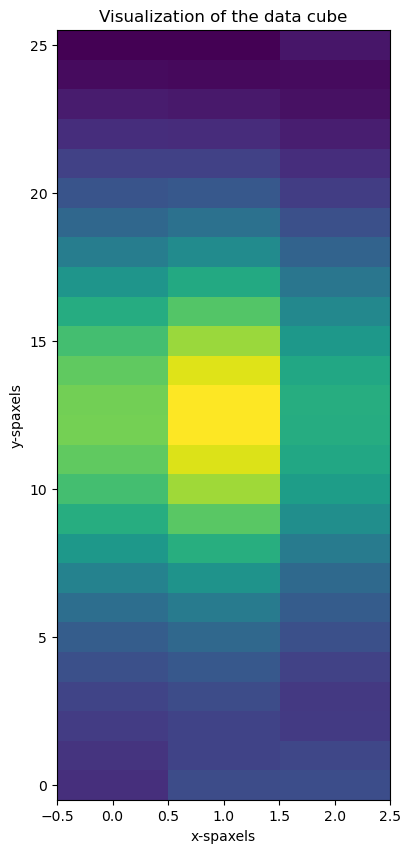

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import FunctionsDiskIntegrate as di
from astropy.utils.data import get_pkg_data_filename
from astropy.io import fits

raw_data, wave, pix_x, pix_y, dx, dy = di.visualize("Data/MOV_Enceladus_SCI_IFU_MERGE3D_DATA_OBJ_UVB.fits")


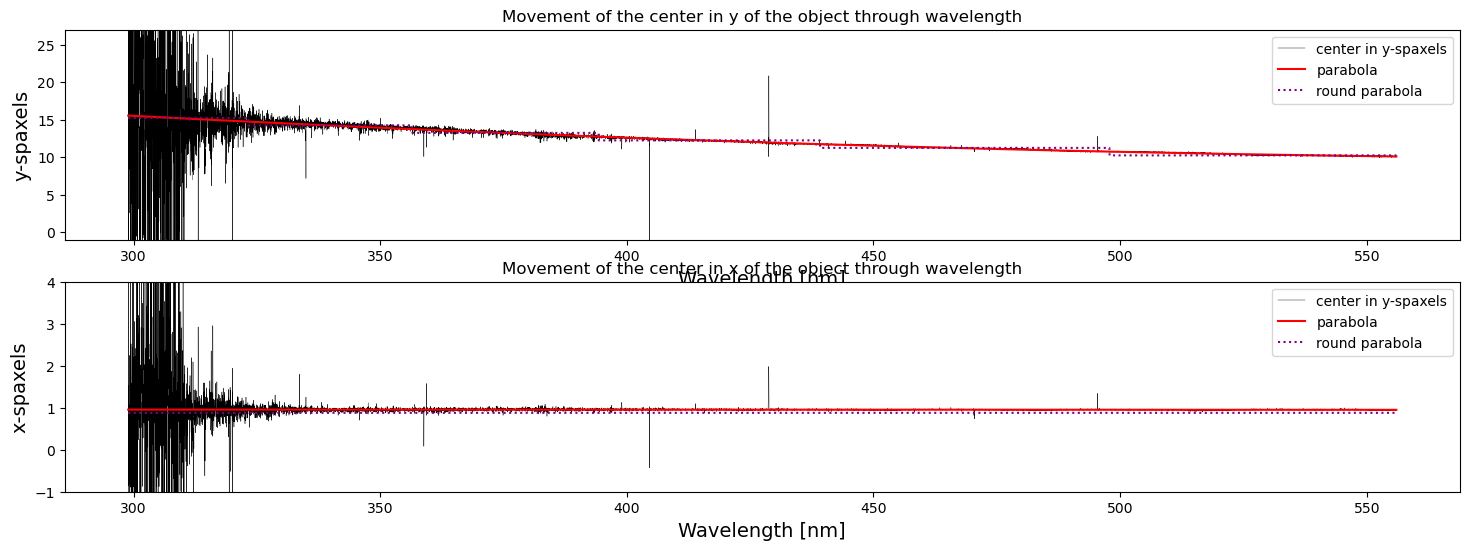

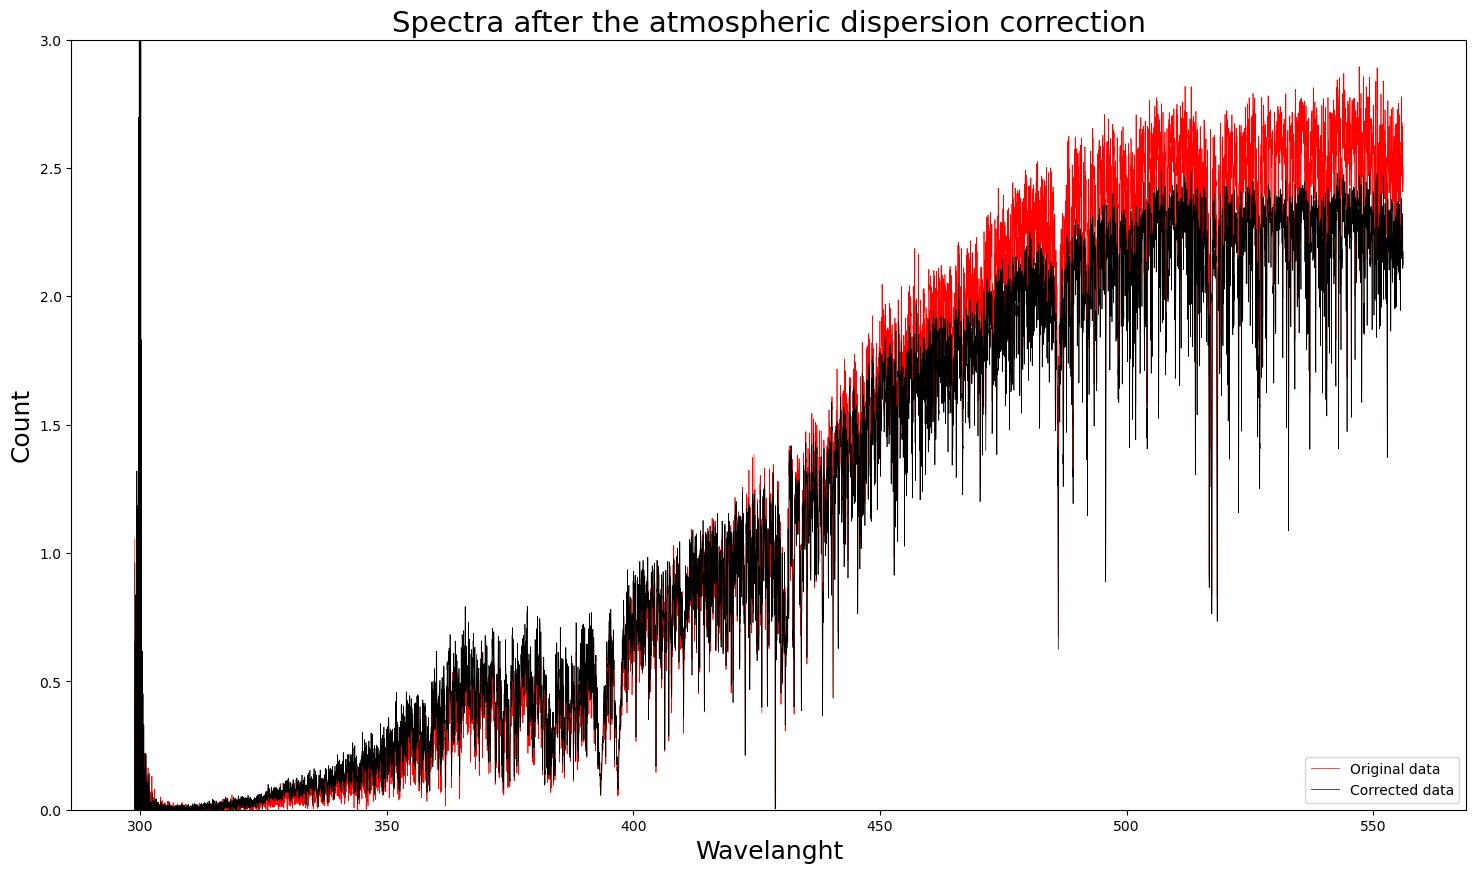

In [ ]:
data, center = di.Atmospheric_dispersion_correction("Data\MOV_Enceladus_SCI_IFU_MERGE3D_DATA_OBJ_UVB.fits", range_y=(350, 550), range_x=(350, 550), plots=True)

In [ ]:
clean_data = di.Sigma_clipping_adapted_for_IFU("", data=data, wave=wave) 

(0.0, 940.2704262245709)

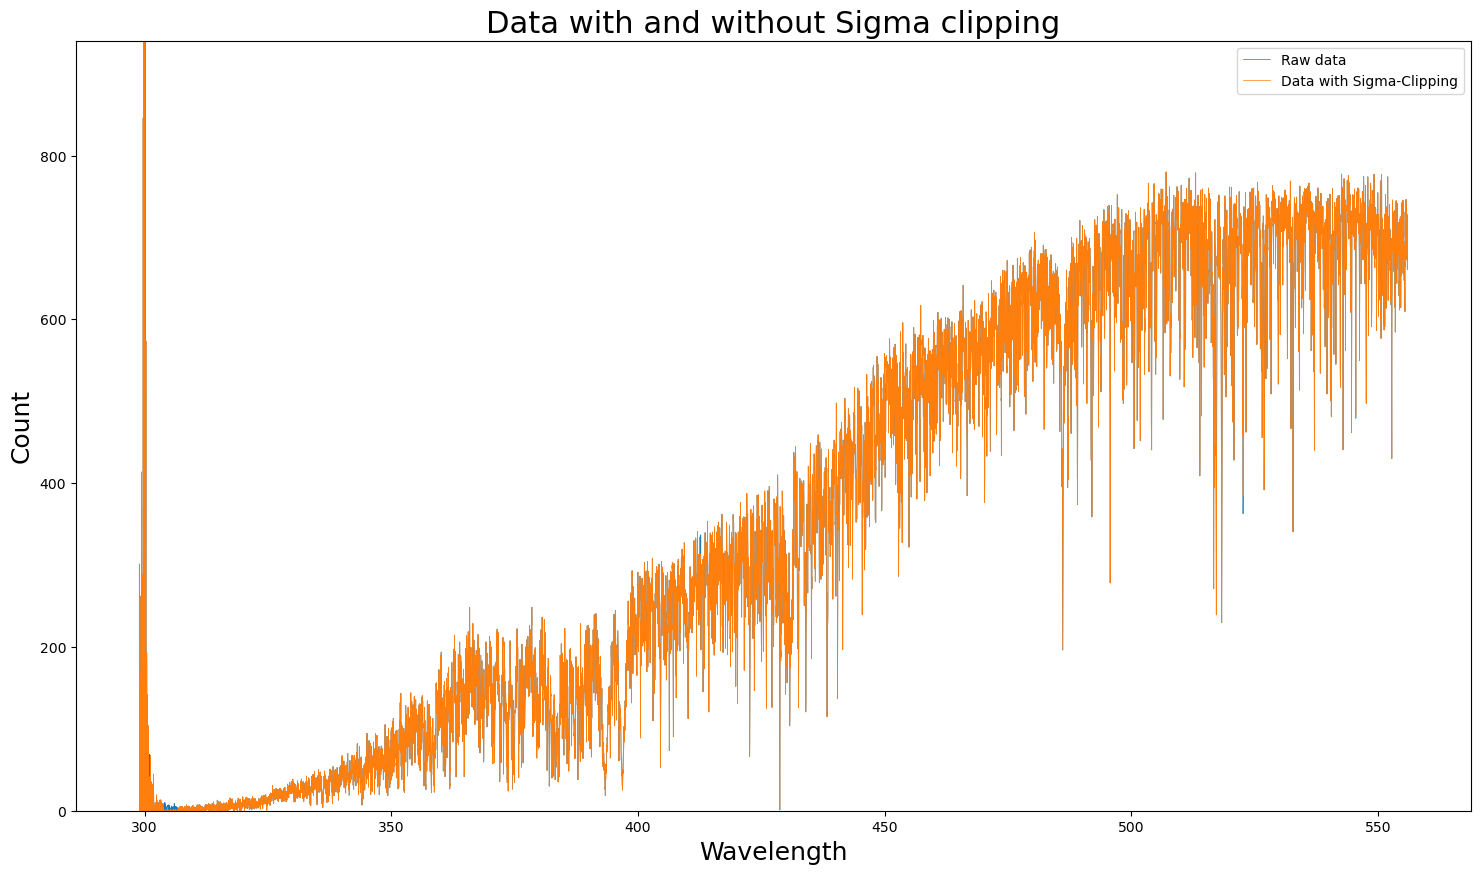

In [ ]:
fig, axes = plt.subplots(1, 1, figsize=(18, 10))
median = np.median(data[:, center[0], center[1]])
axes.plot(wave, data[:, center[0], center[1]], linewidth=0.5, label="Raw data")
axes.plot(wave, clean_data[:, center[0], center[1]], linewidth=0.5, label="Data with Sigma-Clipping")
axes.set_title("Data with and without Sigma clipping", fontsize=22)
axes.set_xlabel("Wavelength", fontsize=18)
axes.set_ylabel("Count", fontsize=18)
axes.legend()
axes.set_ylim(0, median*3)

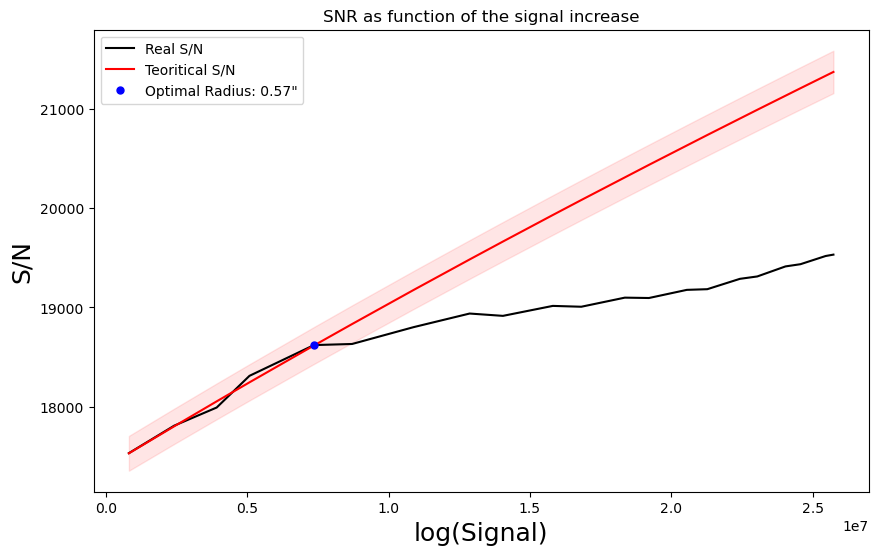

In [ ]:
radius, radius_spaxels = di.optimal_radius_selection_IFU("", center, 450, 480, data=clean_data, wave=wave, percentage=25, error=1)

In [ ]:
final_data = di.Disk_integrate(" ", center, radius, data=clean_data, wave=wave)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


(0.0, 11105.88578642754)

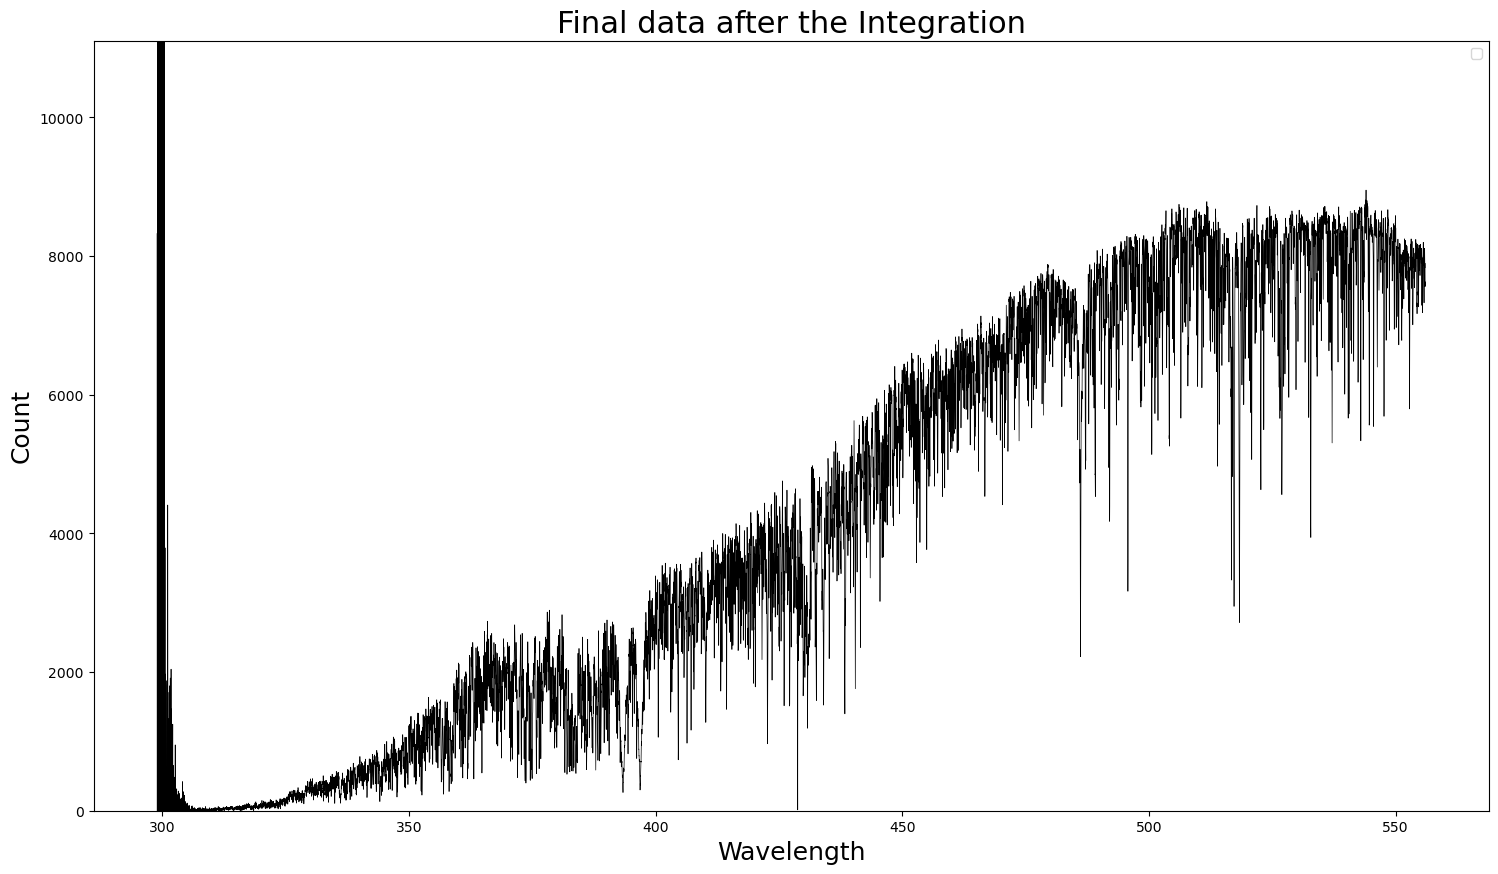

In [ ]:
fig, axes = plt.subplots(1, 1, figsize=(18, 10))
median = np.median(final_data)
axes.plot(wave, final_data, c="k", linewidth=0.5)
axes.set_title("Final data after the Integration", fontsize=22)
axes.set_xlabel("Wavelength", fontsize=18)
axes.set_ylabel("Count", fontsize=18)
axes.legend()
axes.set_ylim(0, median*3)